# **Real time handwritten digits recognition using convolutional neural network**

# **Importing packages**

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
import cv2
from google.colab import files
import random

# **Reading the data**

In [2]:
train=pd.read_csv("/content/drive/My Drive/Data_set/mnist_train.csv")
test=pd.read_csv("/content/drive/My Drive/Data_set/mnist_test.csv")

# **Train data**

In [3]:
print("Training Data Set \n")
train

Training Data Set 



,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590,0.591,0.592,0.593,0.594,0.595,0.596,0.597,0.598,0.599,0.600,0.601,0.602,0.603,0.604,0.605,0.606,0.607,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59995,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59996,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59997,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **Test data**

In [4]:
print("Test Data Set \n")
test

Test Data Set 



,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648,0.649,0.650,0.651,0.652,0.653,0.654,0.655,0.656,0.657,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9995,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9996,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9997,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **Dividing data into dependent and independent columns**

In [5]:
train_label_csv=train['5']
train_csv=train.drop('5',axis=1)
test_label_csv=test['7']
test_csv=test.drop('7',axis=1)

# **Visualizing an image from the train data**

Enter Digit value (0 to 9): 8


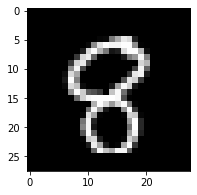

Image no. in train data :  49821


In [9]:
idx=random.randrange(0,59999)
inpt=int(input("Enter Digit value (0 to 9): "))
while(True):
  if(train_label_csv[idx]==inpt):
    plt.figure(figsize=(3,3))
    grid_data=train_csv.iloc[idx].values.reshape(28,28)
    plt.imshow(grid_data,interpolation="none",cmap="gray")
    plt.show()
    print("Image no. in train data : ",idx)
    break
  idx=idx+1   

# **Reshaping and normalizing the data**

In [10]:
train_set=train_csv.to_numpy()
test_set=test_csv.to_numpy()

train_label_set=train_label_csv.to_numpy()
test_label_set=test_label_csv.to_numpy()

train_set=train_set.reshape(train_csv.shape[0], 28, 28, 1)
test_set = test_set.reshape(test_csv.shape[0], 28, 28, 1)

train_set = train_set / 255.0
test_set = test_set / 255.0

train_set , dev_set = train_set[:57999], train_set[58000:]
train_label_set, dev_label_set=train_label_set[:57999],train_label_set[58000:]

# **Building CNN model**

In [46]:
jarvis = keras.Sequential([
                           
  layers.Conv2D(filters=64,kernel_size=(5,5),activation='relu',input_shape=(28, 28, 1)),
  layers.MaxPooling2D(pool_size=(2, 2)),

  layers.Conv2D(filters=128,kernel_size=(5,5),activation='relu'),
  layers.MaxPooling2D((2,2)),

  layers.Conv2D(filters=256,kernel_size=(3,3),activation='relu'),

  layers.Dropout(rate=0.5),

  layers.Flatten(),

  layers.Dense(units=256,activation='relu'),
  layers.Dense(units=10,activation='softmax')
  
])

In [25]:
jarvis.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 2, 2, 256)         295168    
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 2, 256)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)             

In [47]:
jarvis.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
result=jarvis.fit(train_set,train_label_set,
                  validation_data=(dev_set,dev_label_set),
                   batch_size=192,
                   epochs=400,
                  steps_per_epoch=25)

Epoch 1/400
25/25 [==============================] - 1s 20ms/step - loss: 1.7090 - accuracy: 0.4289 - val_loss: 0.2758 - val_accuracy: 0.9240
Epoch 2/400
25/25 [==============================] - 0s 12ms/step - loss: 0.3842 - accuracy: 0.8788 - val_loss: 0.1459 - val_accuracy: 0.9630
Epoch 3/400
25/25 [==============================] - 0s 12ms/step - loss: 0.2238 - accuracy: 0.9267 - val_loss: 0.1258 - val_accuracy: 0.9655
Epoch 4/400
25/25 [==============================] - 0s 12ms/step - loss: 0.2025 - accuracy: 0.9407 - val_loss: 0.0830 - val_accuracy: 0.9785
Epoch 5/400
25/25 [==============================] - 0s 12ms/step - loss: 0.1509 - accuracy: 0.9535 - val_loss: 0.0727 - val_accuracy: 0.9840
Epoch 6/400
25/25 [==============================] - 0s 12ms/step - loss: 0.1273 - accuracy: 0.9635 - val_loss: 0.0702 - val_accuracy: 0.9825
Epoch 7/400
25/25 [==============================] - 0s 12ms/step - loss: 0.1116 - accuracy: 0.9660 - val_loss: 0.0601 - val_accuracy: 0.9870
Epoch 

# **Accuracy and loss on the test data**

In [49]:
test_predict=jarvis.predict(test_set)
test_score = jarvis.evaluate(test_set, test_label_set)

print("\nTest loss = {}%\n".format(round(100-test_score[1]*100,2)))
print("Test accuracy = {}%".format(round(test_score[1]*100,2)))

313/313 [==============================] - 1s 2ms/step - loss: 0.0318 - accuracy: 0.9944

Test loss = 0.56%

Test accuracy = 99.44%


# **Plotting graphs**

Training Accuracy & Validation Accuracy

<Figure size 432x288 with 0 Axes>

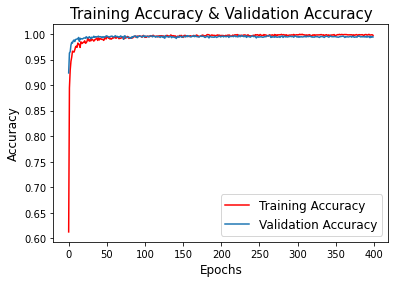

<Figure size 432x288 with 0 Axes>

In [50]:
accuracy = result.history['accuracy']
val_accuracy = result.history['val_accuracy']

epochs=range(len(accuracy))

plt.plot(epochs,accuracy,"r-")
plt.plot(epochs,val_accuracy)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title ('Training Accuracy & Validation Accuracy',fontsize=15)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=12)
plt.figure()

Training loss & validation loss

<Figure size 432x288 with 0 Axes>

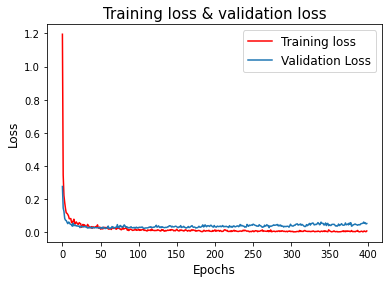

<Figure size 432x288 with 0 Axes>

In [51]:
loss = result.history['loss']
val_loss = result.history['val_loss']

plt.plot(epochs, loss,"r-")
plt.plot(epochs, val_loss)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title ('Training loss & validation loss',fontsize=15)
plt.legend(['Training loss', 'Validation Loss'], fontsize=12)
plt.figure()

# **Predicting images from test data**

Range of index value [0-9999]
enter the index value : 389


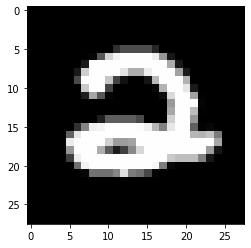

True value of the image is 2
Predicted value of the image is '2' with 100.0 % accuracy


In [52]:
print("Range of index value [0-9999]")
index=int(input("enter the index value : "))

test_pred = np.argmax(test_predict,axis=1)

grid_data=test_csv.iloc[index].to_numpy().reshape(28,28)
plt.imshow(grid_data,interpolation="none",cmap="gray")
plt.show()

print("True value of the image is",np.argmax(test_predict[index]))
print("Predicted value of the image is '{}' with {} % accuracy".
                 format(test_pred[index],np.max((test_predict[index])*100)))

# **Confusion matrix**

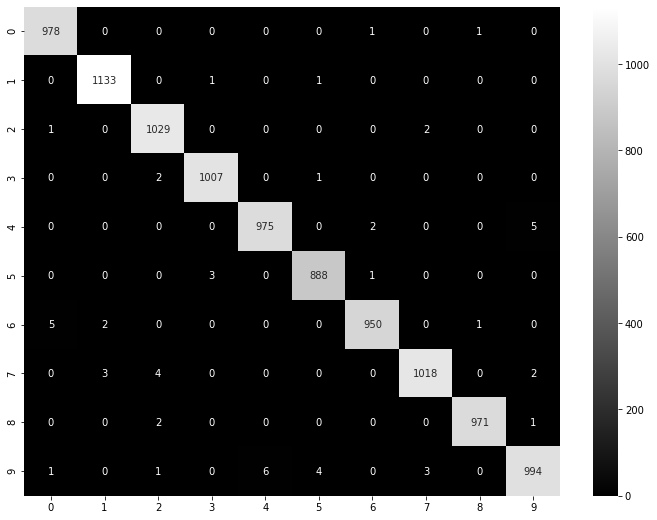

In [65]:
class_labels=['0','1','2','3','4','5','6','7','8','9']

plt.figure(figsize=(12,9))
test_predict_labels=[np.argmax(label) for label in test_predict]
cm=confusion_matrix(test_label_set,test_predict_labels)

sns.heatmap(cm,annot=True,fmt='d',xticklabels=class_labels,yticklabels=class_labels,cmap="binary_r")

# **Classification report**

In [56]:
cr=classification_report(test_label_set,test_predict_labels,target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       1.00      1.00      1.00      1010
           4       0.99      0.99      0.99       982
           5       0.99      1.00      0.99       892
           6       1.00      0.99      0.99       958
           7       1.00      0.99      0.99      1027
           8       1.00      1.00      1.00       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99      9999
   macro avg       0.99      0.99      0.99      9999
weighted avg       0.99      0.99      0.99      9999



# **Image processing**

In [60]:
def real_time_prediction(image_path):
  image_org = cv2.imread(image_path)

  image_grey = cv2.cvtColor(image_org.copy(), cv2.COLOR_BGR2GRAY)

  ret, thresh = cv2.threshold(image_grey.copy(), 247, 255, cv2.THRESH_BINARY_INV)

  contours,hierarchy = cv2.findContours(thresh.copy(), 
                                        cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  dimensions = image_org.shape
  image_new = np.zeros([dimensions[0],dimensions[1],3])
  image_new.fill(255)
  l=[]
  for c in contours:
    if(cv2.contourArea(c)<200):
      continue
    x,y,w,h = cv2.boundingRect(c)
    font_scale=float((h-3)/30)
    l.append(font_scale)  
  for c in contours:
    if(cv2.contourArea(c) < 200):
      continue
    x,y,w,h = cv2.boundingRect(c)
    font_scale=(min(l)+max(l))/2
    cv2.rectangle(thresh, (x,y), (x+w,y+h), color=(255,0,0), thickness=2)
    digit = thresh[y:y+h, x:x+w]
    resized_digit = cv2.resize(digit, (18,18))
    padded_digit = np.pad(resized_digit, (5,5), "constant", constant_values=0)
    changed = np.array(padded_digit)
    prediction = jarvis.predict(padded_digit.reshape(1,28,28,1))
    cv2.putText(image_new,str(np.argmax(prediction)),(int(x-w*0.1),int(y+h*0.95)),cv2.FONT_HERSHEY_COMPLEX,font_scale,(0,-100,0),2)  
  print("\n--> UPLOADED IMAGE IN HAND WRITTEN FORMAT")
  plt.imshow(image_org)
  plt.show()
  print("\n\n--> PREDICTED IMAGE IN DIGITAL FORMAT")
  plt.imshow(image_new)
  plt.show()

# **Uploading real time handwritten image**

In [66]:
uploaded = files.upload()
for image_path in uploaded.keys():
  print(image_path)
  print("\nImage Successfully Uploaded\n")

Saving test-1.jpeg to test-1.jpeg
test-1.jpeg

Image Successfully Uploaded



# **Predicting real time handwritten image**


--> UPLOADED IMAGE IN HAND WRITTEN FORMAT


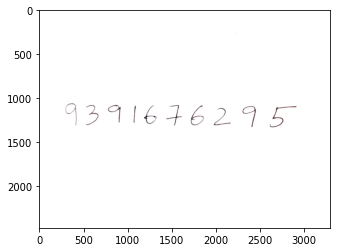

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




--> PREDICTED IMAGE IN DIGITAL FORMAT


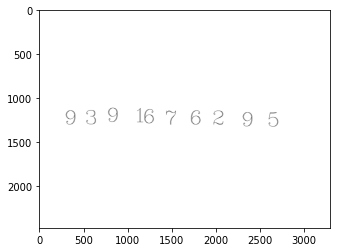

In [67]:
real_time_prediction(image_path)